# Veri Seti Hikayesi
* totol_bill: Yemeğin Toplam Fiyatı
* tip: Bahşiş
* sex: Ücreti Ödeyen Kişinin Cinsiyeti(0 = male, 1 = female)
* smoker: Grupta Sigara İçen Var mı (0 = No, 1 = Yes)
* Day: Gün(3 = Thur, 4 = Fri , 5 = Sat, 6 = Sun)
* time: ne zaman (0 = day, 1 = night)
* size: grupta kaç kişi var ?

In [1]:
import seaborn as sns # Seaborn kütüphensini dahil etme 
tips = sns.load_dataset("tips") # seaborn kütüphanesinde bulunun tips veri setini çağırma işlemi
df = tips.copy() # tips veri setinin kopyasını alarak daha güvenli bir hale getirme işlemi
df.head() # veri setinin ilk 5 elemanını gösterme 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Veri Seti Hakkında Araştırmalar yapalım

* Eksik Değer Kontrolu ? 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


* Sayısal Değişkenler Hakkındaki Bilgiler

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [4]:
df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [5]:
df["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [6]:
df["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [7]:
df["time"].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [8]:
df[["smoker","sex"]].value_counts()

smoker  sex   
No      Male      97
Yes     Male      60
No      Female    54
Yes     Female    33
Name: count, dtype: int64

## Veri Seti Hakkındaki Araştırmalara Grafiksel olarak devam edelim  

 * Tip(bahşiş) in hangi istatistiklerden etkilendiğine bakalım
 * Örneğin;
 *         Cinsiyet tip verme miktarını etkiliyor mu
 *         Sigara içen insanlar mı daha ok tip veriyor yoksa içmeyenler mi 

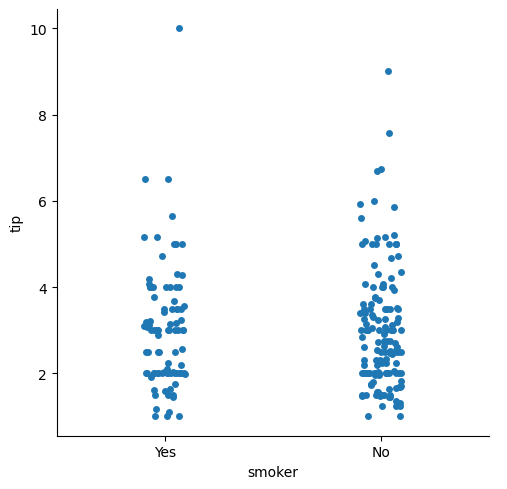

In [9]:
sns.catplot(x = "smoker", y = "tip", data = df, ); # Catplot bir grafik oluşturma işlemi yapar x ekseni y eksenini 
# veriyi nerden alacağını belirledik belirledik.

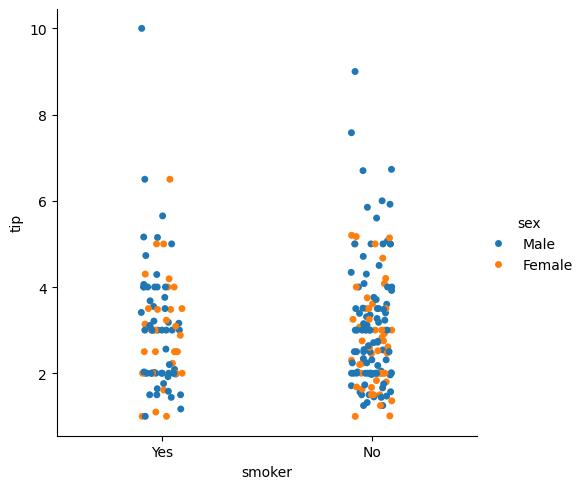

In [10]:
sns.catplot(x = "smoker", y = "tip", hue = "sex", data = df); # Bir eksen daha ekleyip cinsiyetle olan ilişksinide incelemiş olduk 

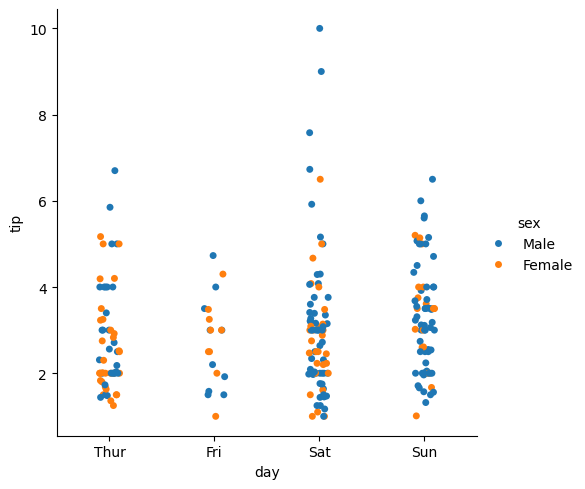

In [11]:
sns.catplot(x = "day" , y = "tip", data = df, hue= "sex");

# Şimdi Yeni Bir Kolon Ekleme İşlemi yapalım 

In [12]:
df["only_food_bill"] = df.total_bill - df.tip
df.head()

,total_bill,tip,sex,smoker,day,time,size,only_food_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98


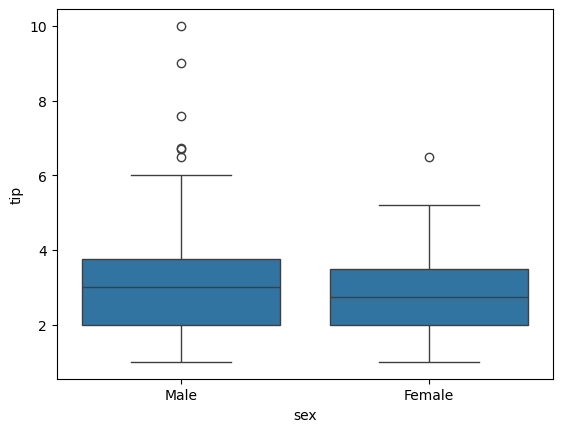

In [13]:
sns.boxplot(x = "sex", y = "tip", data = df); # Yoğunluklu olarak cinsiyetlerin ne kadar tip verdiklerine bakıyoruz 

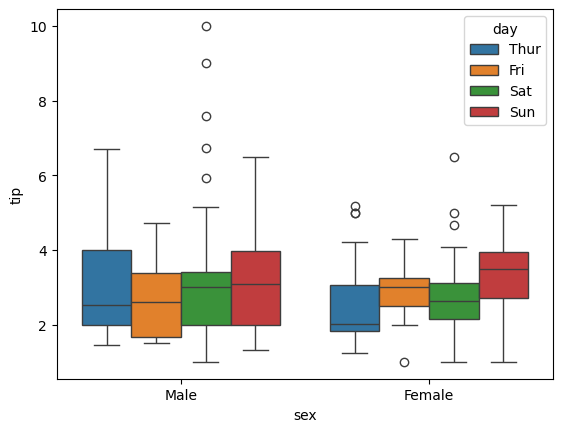

In [14]:
sns.boxplot(x = "sex", y = "tip", hue = "day", data = df);
# Günlere Göre Cinsiyetlerin ne Kadar Yoğınlukta Bahiş verdiğini inceledik 

## Şimdide Şunu İnceleyelim Acaba tipin falazla olduğu zamanlar only_food_bill de mi fazla 

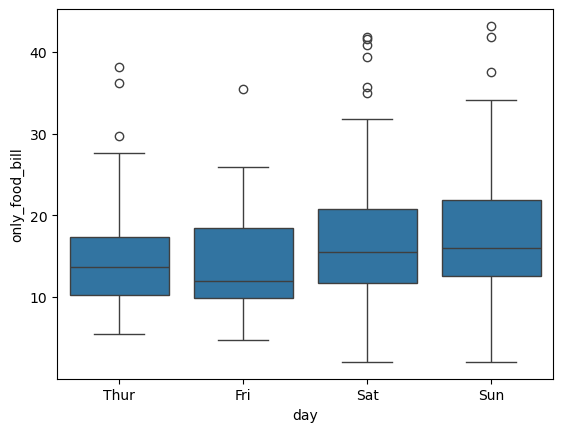

In [15]:
sns.boxplot(x = "day",y = "only_food_bill",data = df);

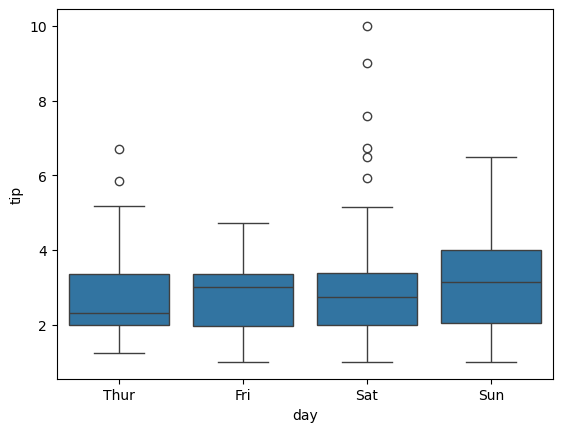

In [16]:
sns.boxplot(x = "day", y = "tip", data = df);

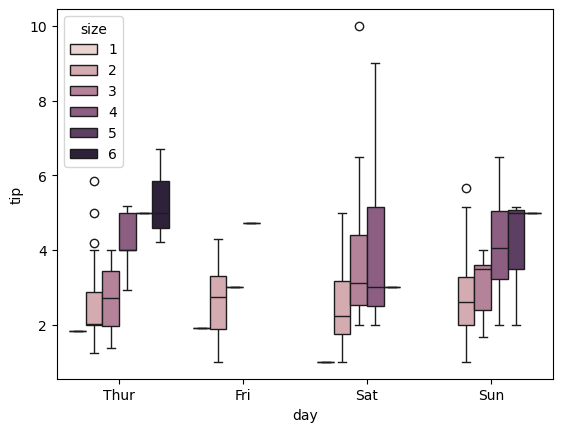

In [17]:
sns.boxplot(x = "day", y = "tip", hue = "size",data = df);

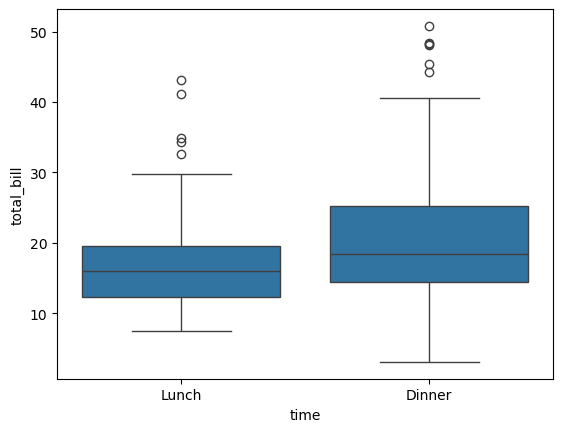

In [18]:
sns.boxplot(x = "time" , y = "total_bill", data = df);

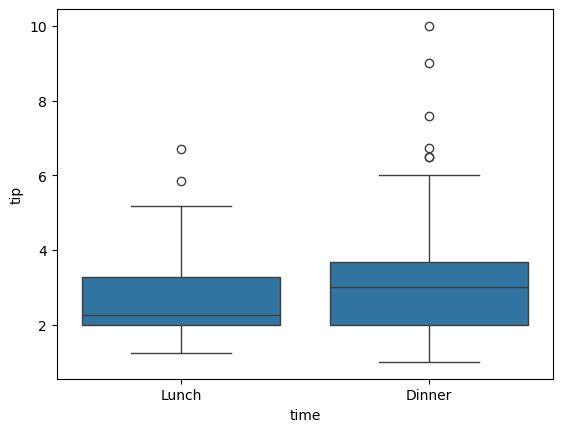

In [19]:
sns.boxplot(x = "time" , y = "tip", data = df);

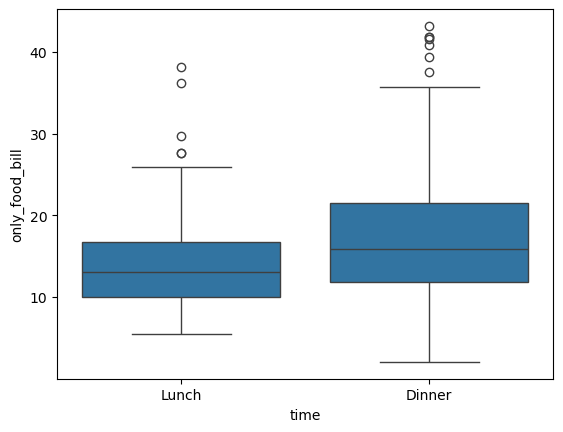

In [20]:
sns.boxplot(x = "time" , y = "only_food_bill", data = df);

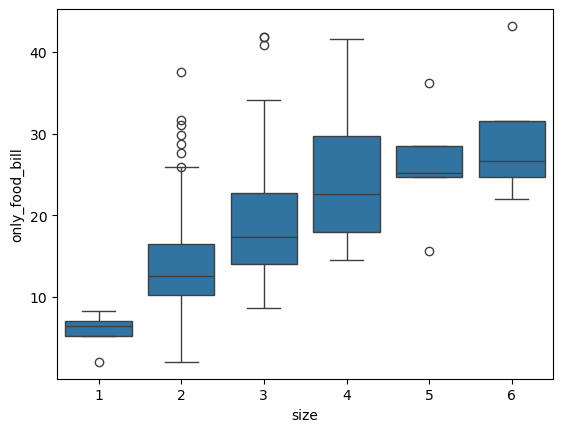

In [21]:
sns.boxplot(x = "size" , y = "only_food_bill", data = df);

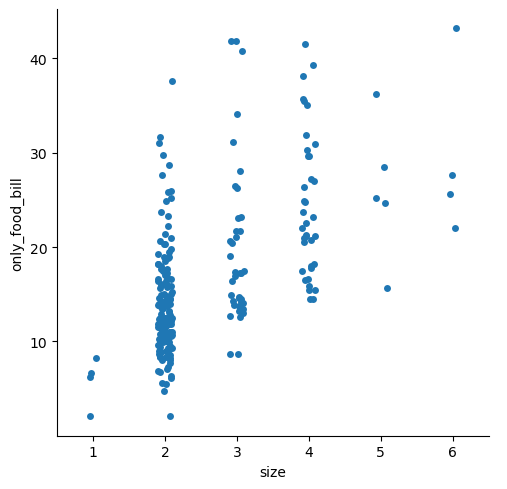

In [22]:
sns.catplot(y = "only_food_bill", x = "size",  data = df);

## Violin Grafiği 

In [23]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,only_food_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98


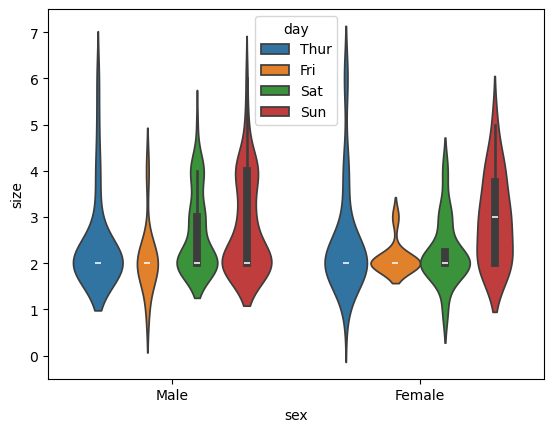

In [27]:
sns.violinplot(x = "sex", y = "size", hue = "day", data = df);

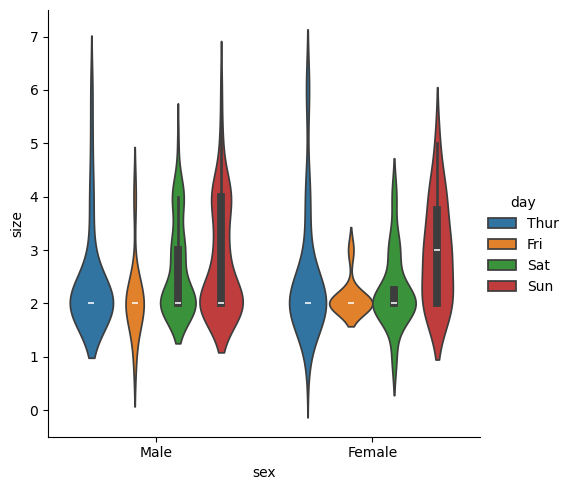

In [33]:
sns.catplot(x = "sex", y = "size", hue = "day",  kind = "violin", data = df);

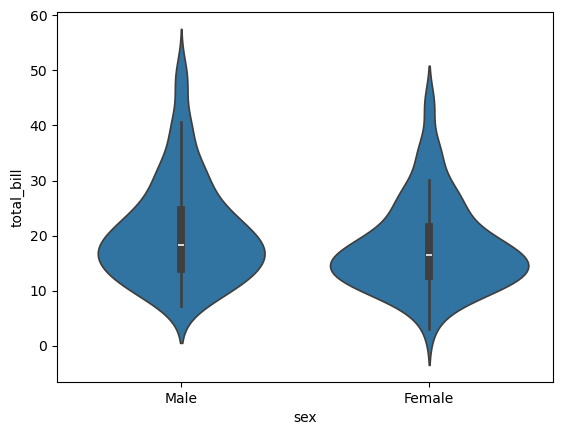

In [39]:
sns.violinplot(y = "total_bill", x = "sex" , data = df);

## Korelasyon Grafiğinin Oluşması 

* Scatterplot sayıyal değişkenler arasındaki ilişkiyi gösterir

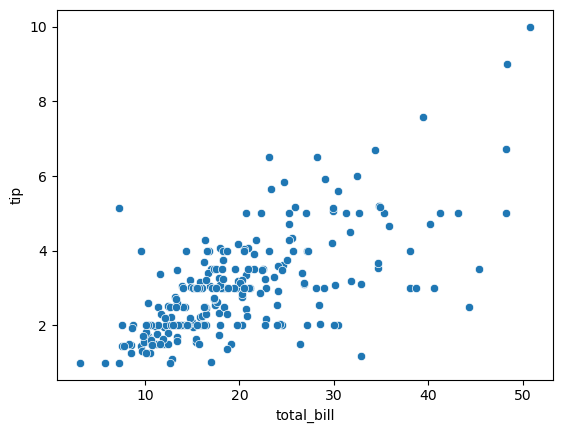

In [47]:
sns.scatterplot(x = "total_bill", y = "tip",  data = df);

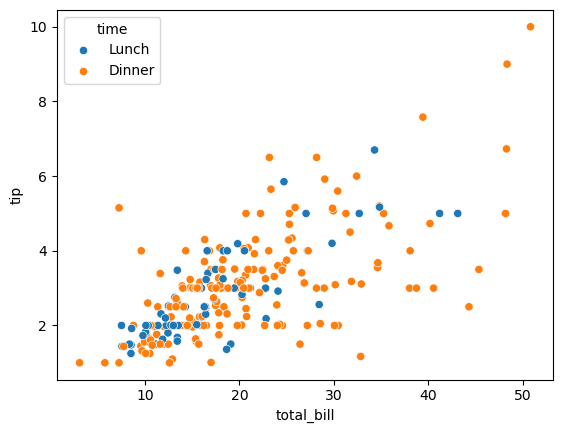

In [49]:
sns.scatterplot(x = "total_bill",y = "tip", hue = "time",data =df);

In [53]:
df[["time"]].value_counts()

time  
Dinner    176
Lunch      68
Name: count, dtype: int64

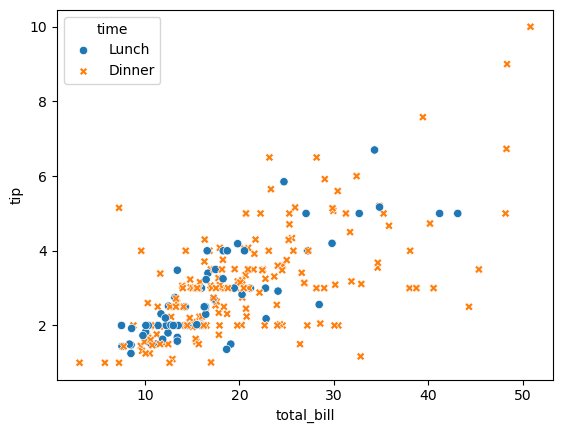

In [54]:
sns.scatterplot(x = "total_bill" , y = "tip", hue = "time", style ="time" , data = df);

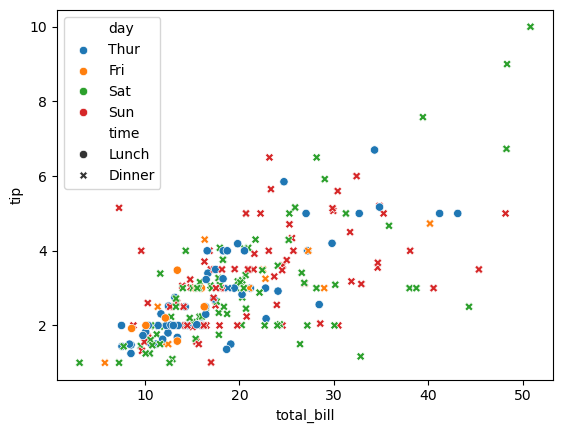

In [57]:
sns.scatterplot(x = "total_bill" , y = "tip", hue = "day", style ="time" , data = df);

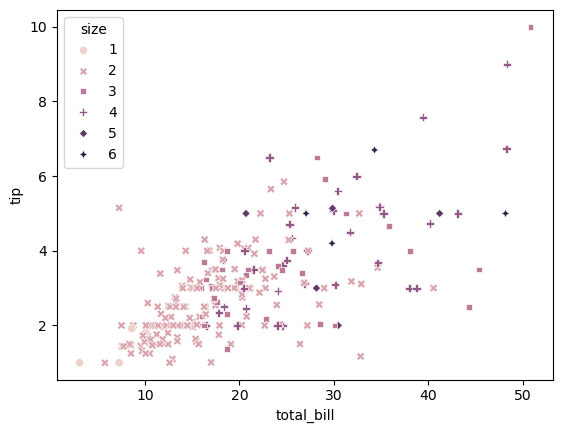

In [59]:
sns.scatterplot(x = "total_bill" , y = "tip", hue = "size", style = "size" , data = df);

# Doğrusal İlişkinin Gösterilmesi:

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

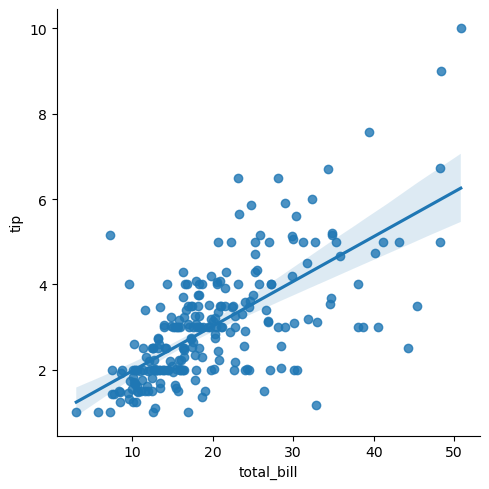

In [64]:
sns.lmplot(x = "total_bill" , y = "tip", data = df);

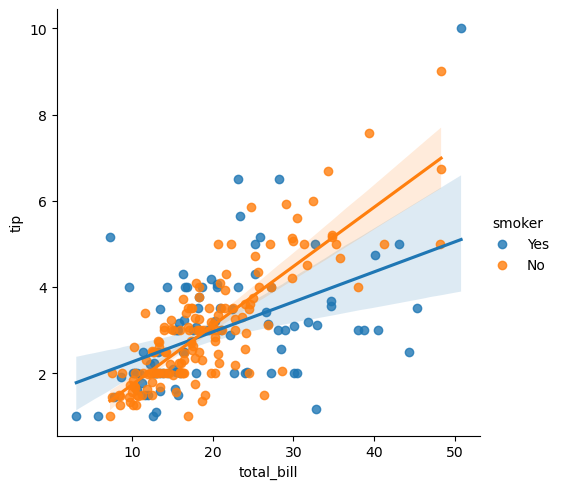

In [65]:
sns.lmplot(x = "total_bill" , y = "tip", hue = "smoker",data = df);

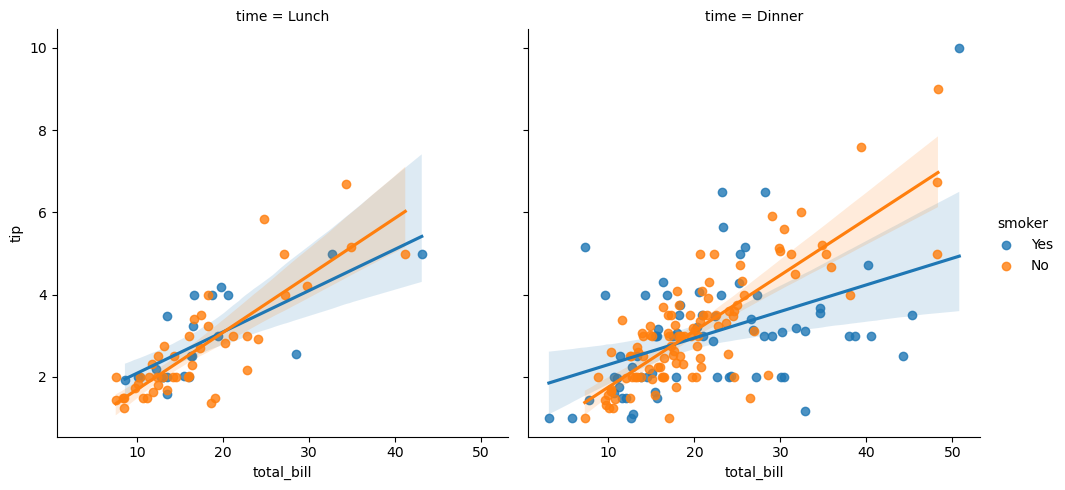

In [66]:
sns.lmplot(x = "total_bill" , y = "tip", hue = "smoker", col = "time",data = df);

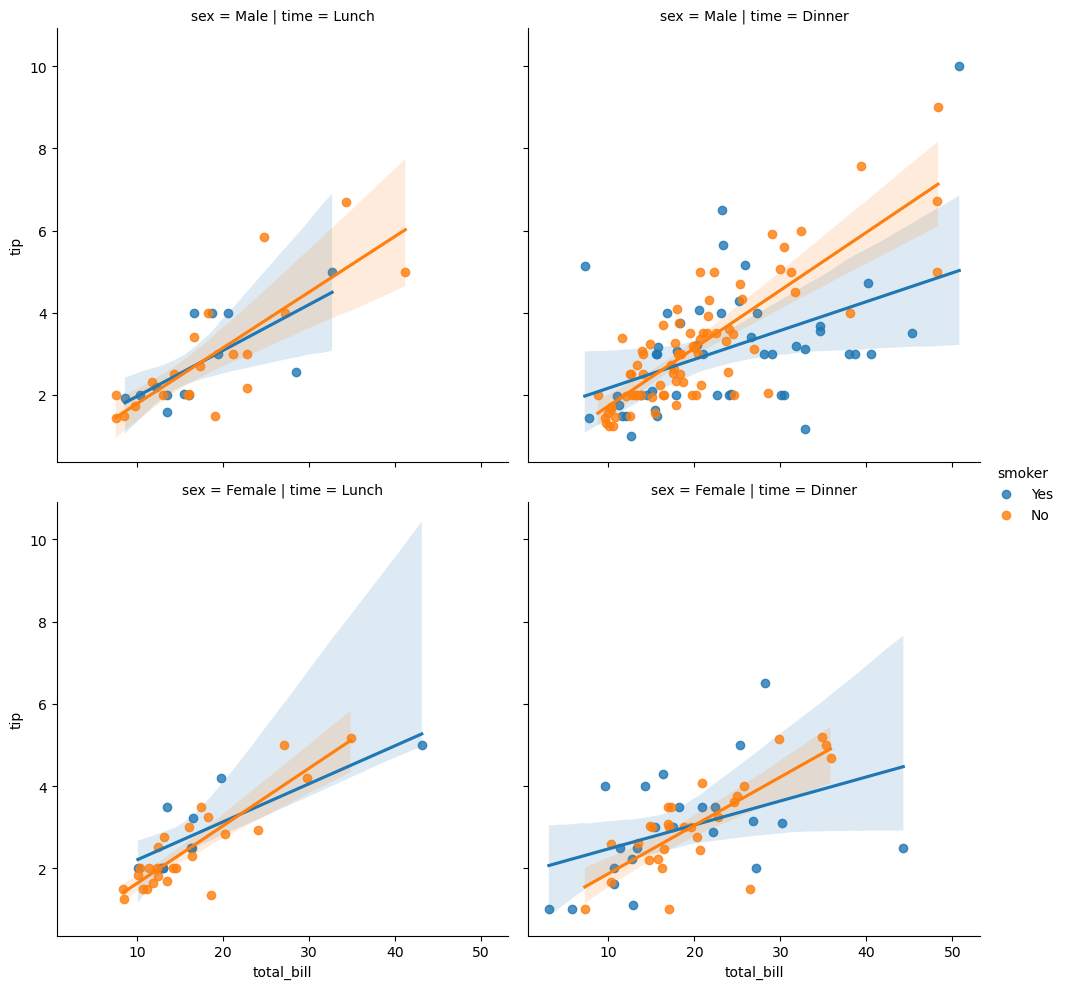

In [67]:
sns.lmplot(x = "total_bill" , y = "tip", hue = "smoker", col = "time",row = "sex",data = df);

# Scatter Plot Matrisi

In [68]:
import seaborn as sns
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [70]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [72]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


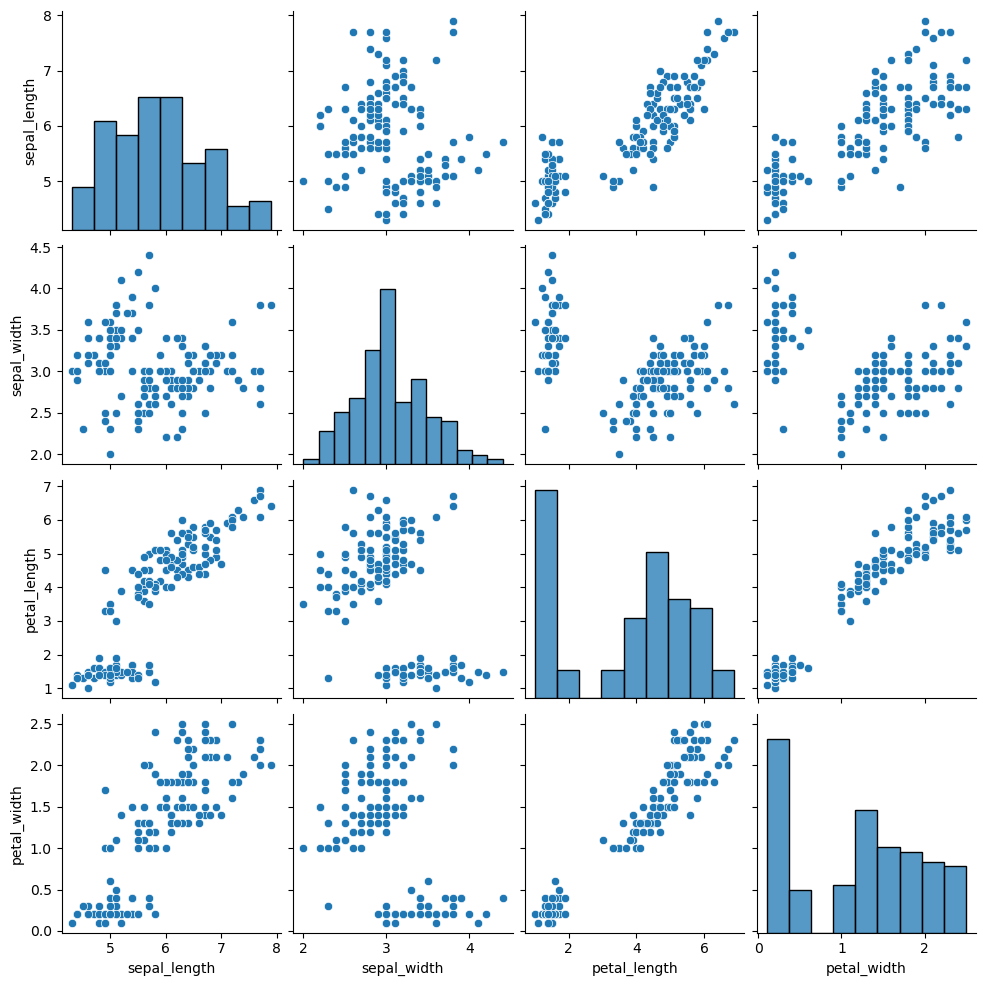

In [79]:
sns.pairplot(data = df); 

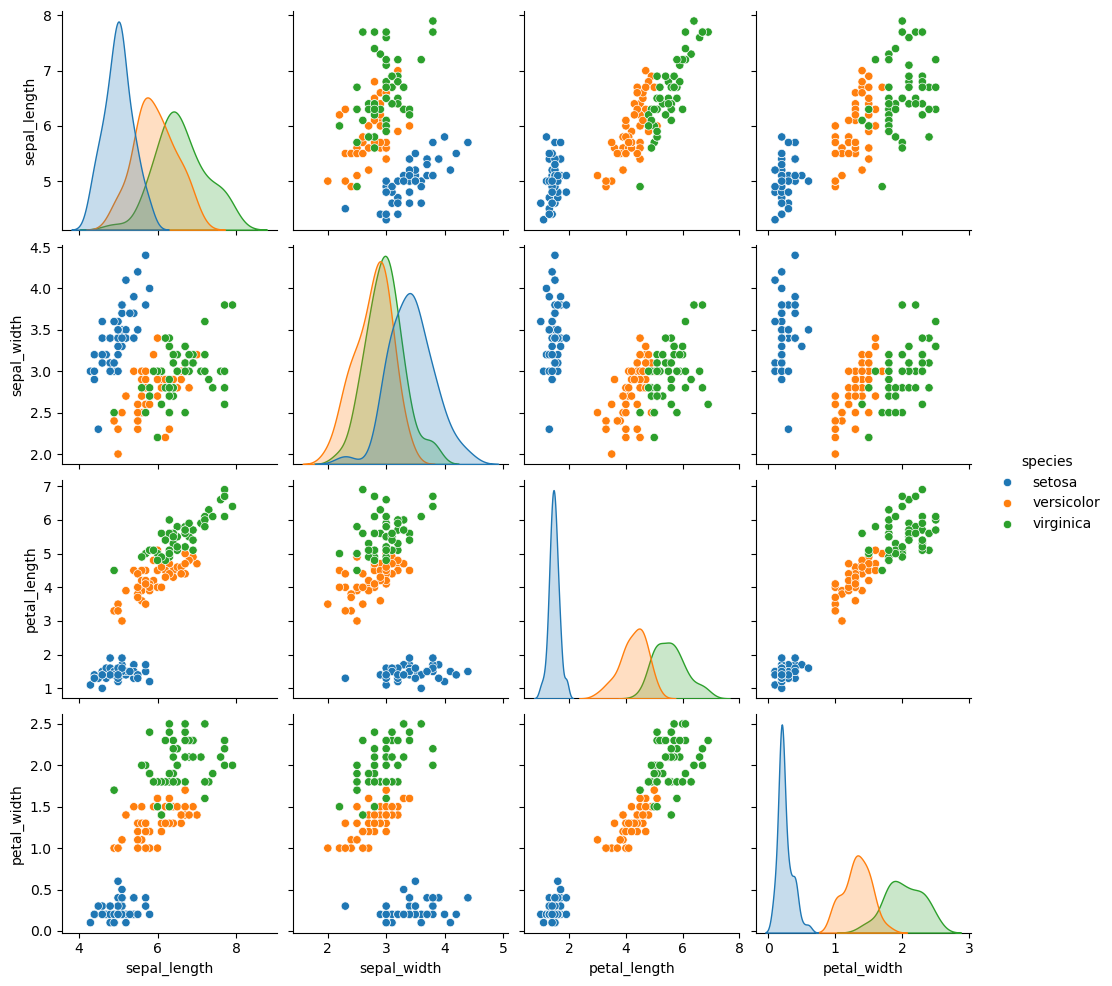

In [80]:
sns.pairplot(data = df, hue = "species"); 

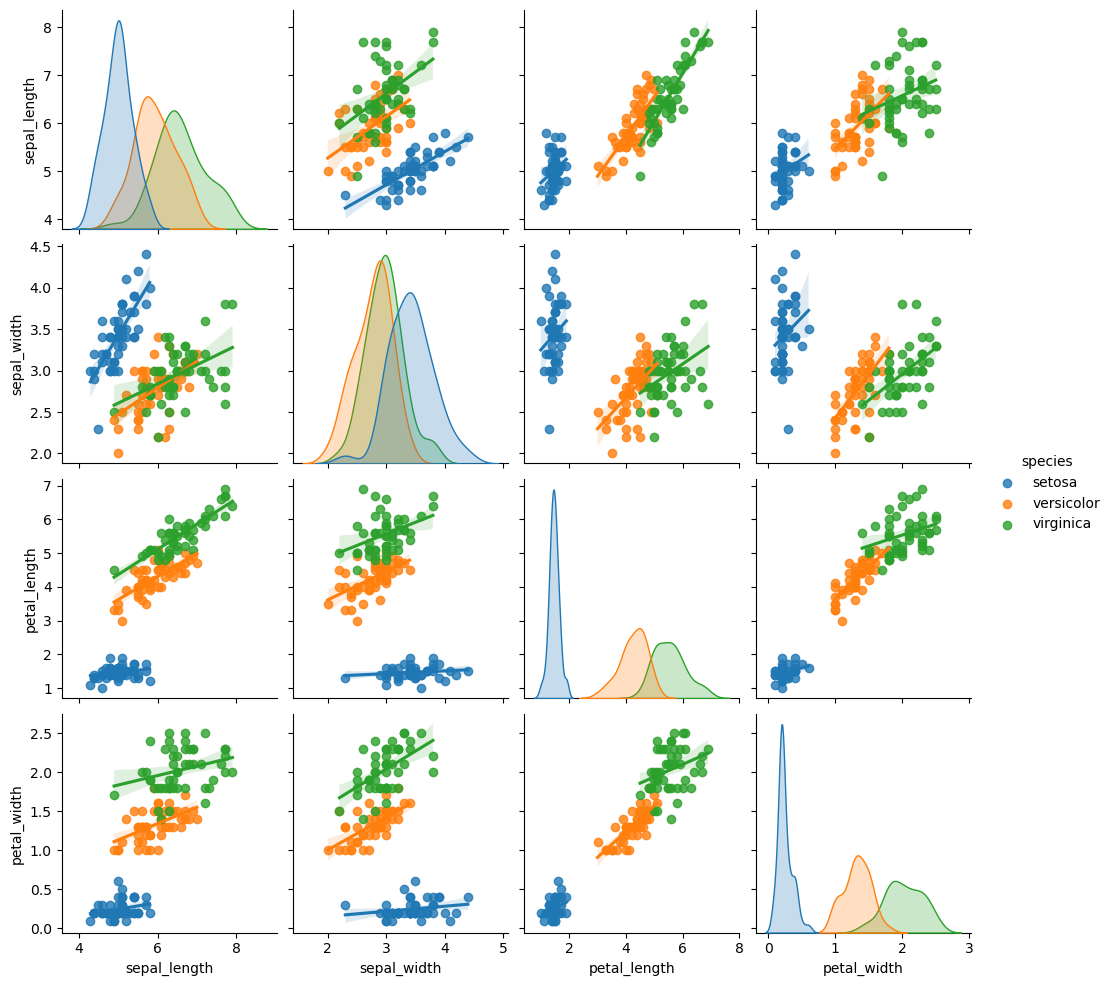

In [96]:
sns.pairplot(data = df, hue = "species", kind = "reg" ); 

# Isı Haritası (Heat Map)

## Veri Seti Hikayesi 

In [97]:
import seaborn as sns
flights = sns.load_dataset("flights")
df = flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [102]:
df.isnull().sum()

year          0
month         0
passengers    0
dtype: int64

In [103]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,144.0,1954.500000,3.464102,1949.0,1951.75,1954.5,1957.25,1960.0
passengers,144.0,280.298611,119.966317,104.0,180.00,265.5,360.50,622.0


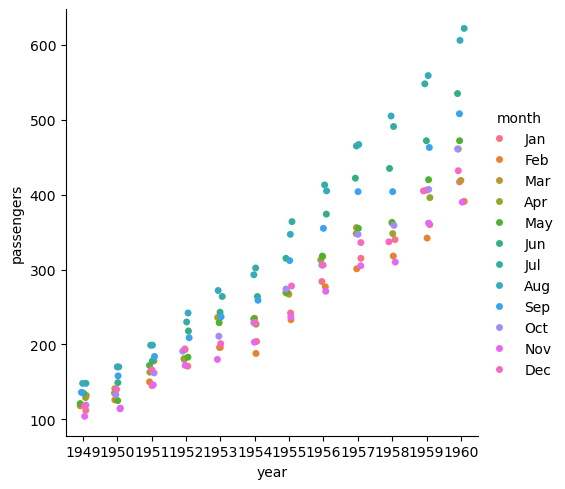

In [106]:
sns.catplot(x = "year",y = "passengers", hue = "month",data = df);

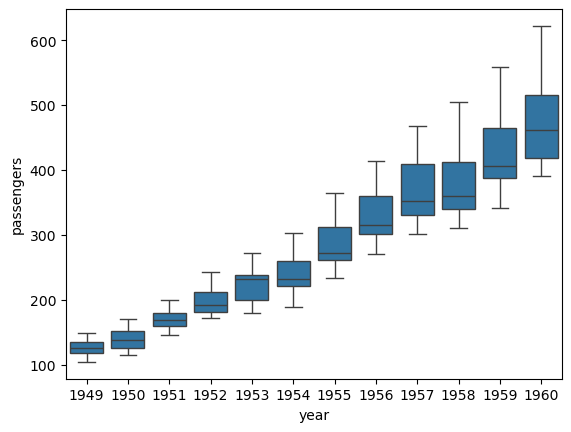

In [110]:
sns.boxplot(x = "year",y = "passengers",data = df);

In [117]:
df = df.pivot(index = "month",columns = "year", values = "passengers");
df # Okunabilir hale getirdik

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


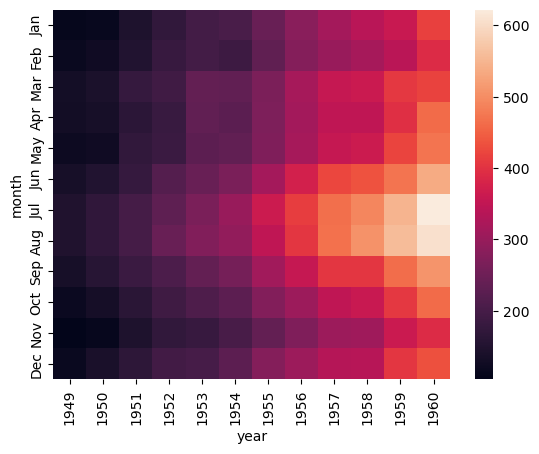

In [119]:
sns.heatmap(df);

In [120]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1949,12.0,126.666667,13.720147,104.0,118.00,125.0,135.25,148.0
1950,12.0,139.666667,19.070841,114.0,125.75,137.5,151.25,170.0
1951,12.0,170.166667,18.438267,145.0,159.00,169.0,179.50,199.0
1952,12.0,197.000000,22.966379,171.0,180.75,192.0,211.25,242.0
1953,12.0,225.000000,28.466887,180.0,199.75,232.0,238.50,272.0
1954,12.0,238.916667,34.924486,188.0,221.25,231.5,260.25,302.0
1955,12.0,284.000000,42.140458,233.0,260.75,272.0,312.75,364.0
1956,12.0,328.250000,47.861780,271.0,300.50,315.0,359.75,413.0
1957,12.0,368.416667,57.890898,301.0,330.75,351.5,408.50,467.0


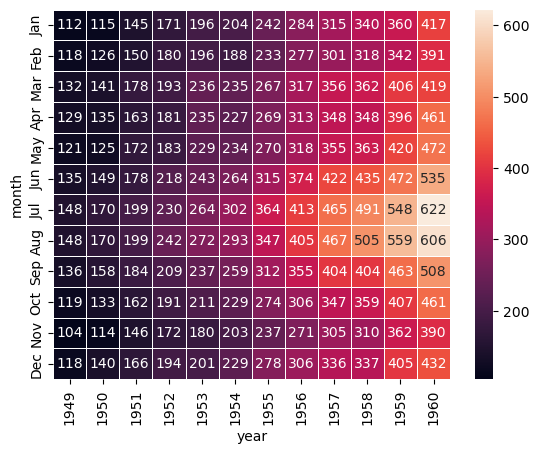

In [123]:
sns.heatmap(df, annot = True, fmt = "d", linewidths= .5, linecolor= "white");

# Çizgi Grafiği 

In [124]:
import seaborn as sns 
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [126]:
df.isnull().sum()

subject      0
timepoint    0
event        0
region       0
signal       0
dtype: int64

In [127]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timepoint,1064.0,9.00000,5.479801,0.000000,4.00000,9.000000,14.000000,18.000000
signal,1064.0,0.00354,0.093930,-0.255486,-0.04607,-0.013653,0.024293,0.564985


In [132]:
df[["region","event"]].value_counts()

region    event
frontal   cue      266
          stim     266
parietal  cue      266
          stim     266
Name: count, dtype: int64

In [134]:
df["subject"].value_counts()

subject
s13    76
s5     76
s12    76
s11    76
s10    76
s9     76
s8     76
s7     76
s6     76
s4     76
s3     76
s2     76
s1     76
s0     76
Name: count, dtype: int64

In [138]:
df.shape

(1064, 5)

In [143]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [144]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [147]:
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [148]:
df.groupby("signal").count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


In [149]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


## Çizgi Grafiğinin Oluşturulması

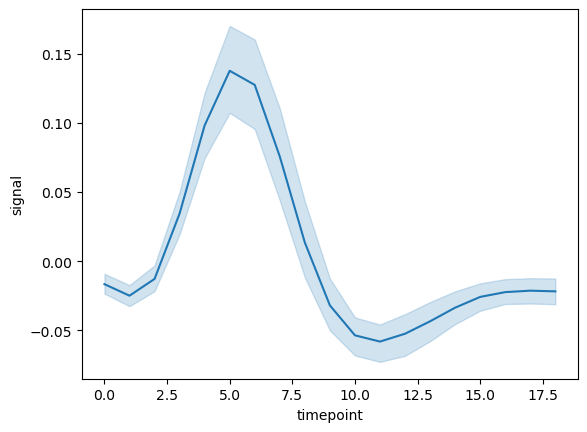

In [154]:
sns.lineplot(x = "timepoint",y = "signal", data = df);

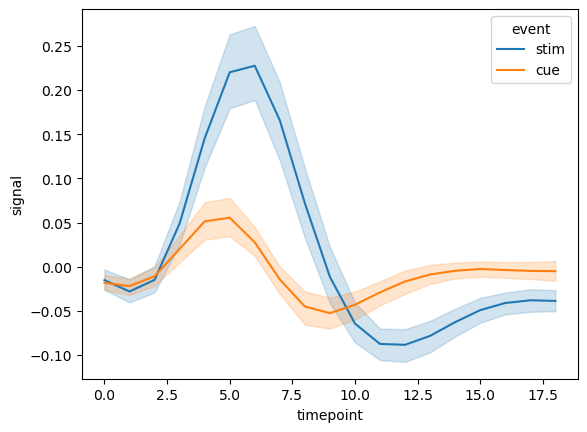

In [155]:
sns.lineplot(x = "timepoint",y = "signal", hue = "event", data = df);

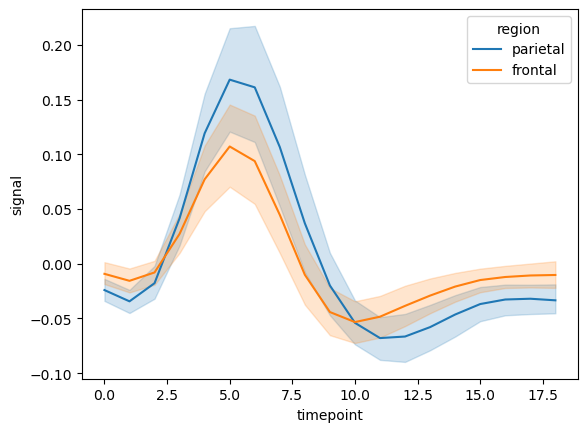

In [156]:
sns.lineplot(x = "timepoint",y = "signal", hue = "region", data = df);


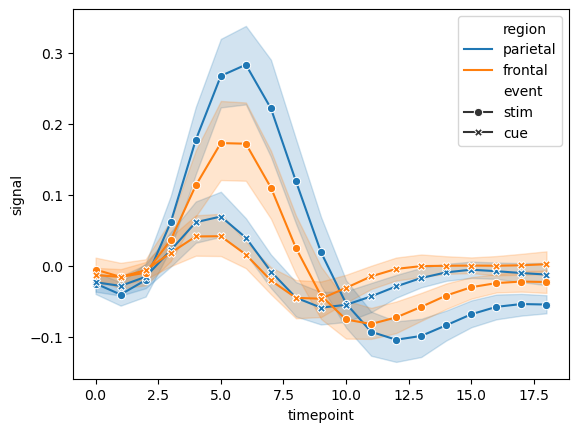

In [175]:
sns.lineplot(x = "timepoint",
             y = "signal", 
             hue = "region",
             style= "event",
             markers=True,
             dashes =False,
             data = df);

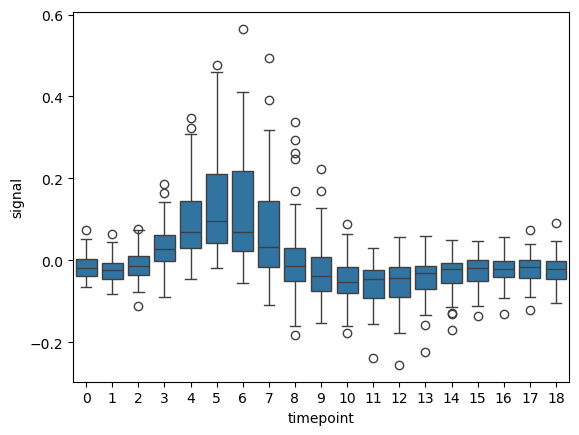

In [170]:
sns.boxplot(x = "timepoint",y = "signal", data = df);


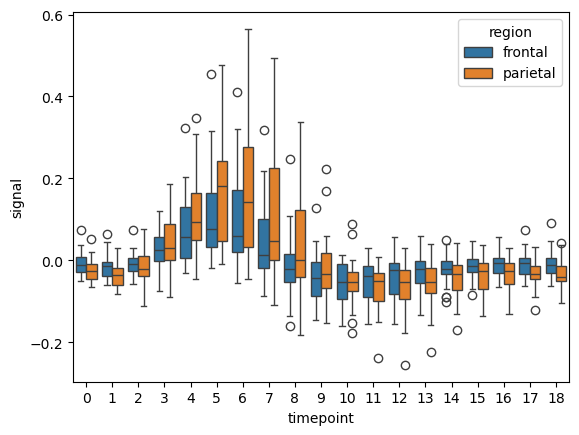

In [171]:
sns.boxplot(x = "timepoint",y = "signal", hue = "region", data = df);

# Basit Bir Zaman Seti Grafiği 

In [5]:
%pip install yfinance --upgrade

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     -------------------------------------- 949.2/949.2 kB 4.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 8.6 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15618 sha256=580f9cce6b6250cd0ad

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [8]:
import yfinance as yf

# Veri çek: Apple için 2016-2019 arası
df = yf.download("AAPL", start="2016-01-01", end="2019-08-25", auto_adjust= True)

# İlk 5 satır
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2016-01-04  23.803158  23.807678  23.046247  23.184073  270597600
2016-01-05  23.206671  23.916134  23.138889  23.893540  223164000
2016-01-06  22.752522  23.129849  22.564990  22.720890  273829600
2016-01-07  21.792265  22.623738  21.787747  22.296120  324377600
2016-01-08  21.907492  22.393271  21.862304  22.266743  283192000


In [9]:
df.shape

(917, 5)

In [12]:
df["Open"].head()

Ticker,AAPL
Date,
2016-01-04,23.184073
2016-01-05,23.893540
2016-01-06,22.720890
2016-01-07,22.296120
2016-01-08,22.266743


In [13]:
df["Close"].head()

Ticker,AAPL
Date,
2016-01-04,23.803158
2016-01-05,23.206671
2016-01-06,22.752522
2016-01-07,21.792265
2016-01-08,21.907492


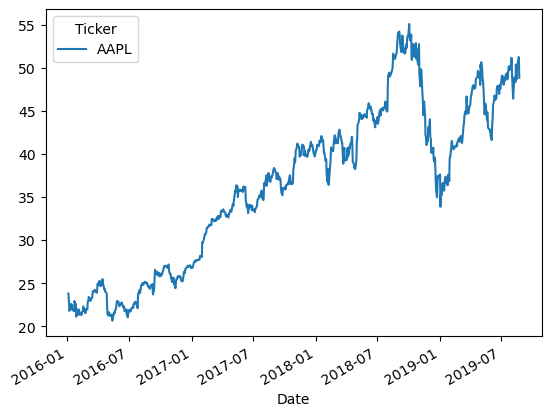

In [14]:
df["Close"].plot();

In [16]:
df["Close"].index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2019-08-12', '2019-08-13', '2019-08-14', '2019-08-15',
               '2019-08-16', '2019-08-19', '2019-08-20', '2019-08-21',
               '2019-08-22', '2019-08-23'],
              dtype='datetime64[ns]', name='Date', length=917, freq=None)

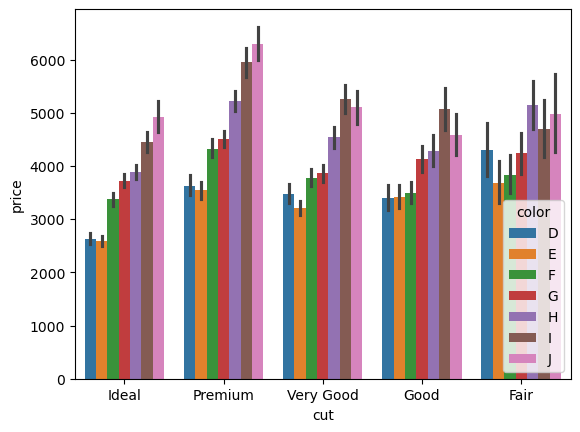

In [21]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
sns.barplot(x = "cut", y = "price", hue = "color", data = df);